## Initializing and Loading Data

In [1]:
file_location = "../Datasets/TMDB_movie_dataset_v11.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
backup = pd.read_csv(file_location)

### Backup

In [4]:
data = backup.copy(deep=True)

## Initial Data Cleaning

In [5]:
initial = len(data)
before = initial
initial

1140108

### Getting rid of duplicate rows

In [6]:
data = data.drop_duplicates()
after = len(data)
print(f"Removed {(before - after)} duplicate rows. {after} rows left.")
before = after

Removed 368 duplicate rows. 1139740 rows left.


### Removing unreleased movies

The status column shows what stage of production the movie is in. We are only concerned with movies that have been released.

In [7]:
data.status.value_counts()

status
Released           1113554
In Production        10491
Post Production       8218
Planned               6812
Rumored                361
Canceled               304
Name: count, dtype: int64

Getting rid of unreleased movies:

In [8]:
data = data[data['status'] == "Released"]
after = len(data)
print(f"Removed {before - after} unreleased movies. {after} rows left.")
before = after

Removed 26186 unreleased movies. 1113554 rows left.



The release date of some rows are in the future, even though they are marked as `'Released'`. `release_date` is currently an `object` type and needs to be converted to a `datetime` type to be handled.

In [9]:
data['release_date'] = pd.to_datetime(data['release_date'])
data.release_date.describe()

count                           942709
mean     1999-12-19 06:00:05.476133120
min                1800-01-01 00:00:00
25%                1989-02-01 00:00:00
50%                2010-10-06 00:00:00
75%                2018-11-29 00:00:00
max                2061-12-07 00:00:00
Name: release_date, dtype: object

Dropping all movies with a release date in the future:

In [10]:
from datetime import date
today = pd.to_datetime(date.today())
data = data[data['release_date'] < today]
after = len(data)
print(f"Removed {before - after} future movies. {after} rows left.")
before = after

Removed 171022 future movies. 942532 rows left.


In [11]:
data.release_date.describe()

count                           942532
mean     1999-12-17 11:16:57.254798720
min                1800-01-01 00:00:00
25%                1989-01-29 00:00:00
50%                2010-10-04 00:00:00
75%                2018-11-28 00:00:00
max                2024-11-29 00:00:00
Name: release_date, dtype: object

Now the status column can be dropped.

In [12]:
data = data.drop(columns='status')
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

### Removing porn

The `adult` column designates if a row is an adult film. These will be dropped:

In [13]:
data = data[data['adult'] == False]
after = len(data)
print(f"Removed {before - after} adult films. {after} rows left.")
before = after

Removed 94597 adult films. 847935 rows left.


### Getting rid of duplicate IDs

In [14]:
print(f"There are {before - data.id.nunique()} rows with a repeated id.")

There are 7 rows with a repeated id.


Lower indexed entries are more up-to-date and more complete. Removing rows with duplicated IDs, only keeping the first occurance.

In [15]:
data = data.drop_duplicates(subset=['id'], keep='first')
after = len(data)
print(f"Removed {before - after} duplicate IDs. {after} rows left.")
before = after

Removed 7 duplicate IDs. 847928 rows left.


In [16]:
data.id.nunique()

847928

### Dropping unusable columns

Checking columns:

In [17]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

In [18]:
data[['backdrop_path', 'homepage', 'poster_path']].describe()

,backdrop_path,homepage,poster_path
count,259844,102245,635043
unique,257685,96471,631487
top,/3CxwYgqGtJ6UEGfWUT0gMYCIlFP.jpg,https://animation.geidai.ac.jp,/wtoKLMm4UvkwvcSwO3XWcs1gJuF.jpg
freq,157,147,54


The `backdrop_path`, `homepage`, and `poster_path` columns do not contain any useful data. These can be dropped.

In [19]:
data = data.drop(columns=['backdrop_path', 'homepage', 'poster_path'])
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

## Analyzing Columns

In [20]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

### `title`

In [21]:
data.title.describe()

count     847924
unique    729266
top         Home
freq         130
Name: title, dtype: object

In [22]:
data['title'].sample(5)

63464     Paleri Manikyam: Oru Pathirakolapathakathinte ...
636180                                          排球少年：陆 VS 空
397006                                                Roach
573132                                House On Haunted Hill
148310                                          Accelerator
Name: title, dtype: object

### `vote_average`

In [23]:
data.vote_average.describe()

count    847928.000000
mean          2.286612
std           3.141303
min           0.000000
25%           0.000000
50%           0.000000
75%           5.342250
max          10.000000
Name: vote_average, dtype: float64

<Axes: ylabel='Frequency'>

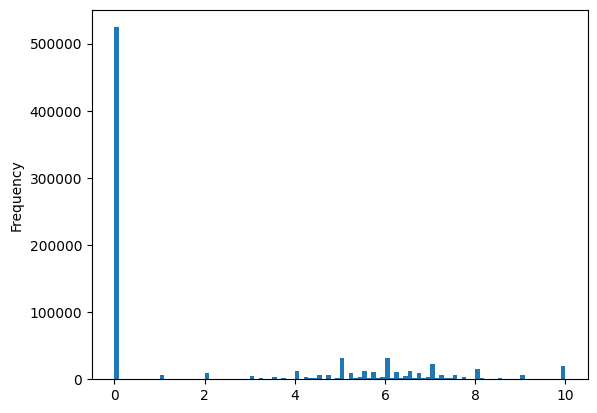

In [24]:
data.vote_average.plot.hist(bins=100)

There are an overwhelmingly large amount of $0.0$ vote averages. This is because they have $0$ `vote_count`. It's inappropriate to consider a movie with no votes to be $0.0$ on a $1\text{-}10$ scale that does not permit $0$. These should be replaced with `NaN`.

<Axes: ylabel='Frequency'>

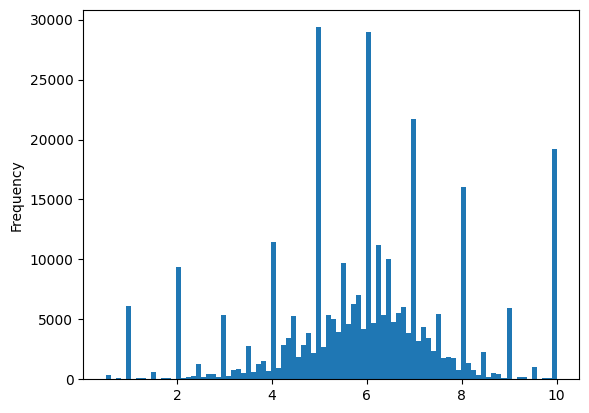

In [25]:
data.vote_average.replace(0, np.nan, inplace=True)
data.vote_average.plot.hist(bins=90)

In [26]:
scoredNoVotes = data.query('vote_count == 0 and vote_average != 0')
print(f"Amount of movies with no votes but have a vote average anyway: {len(scoredNoVotes)}")
scoredNoVotes.sample()

Amount of movies with no votes but have a vote average anyway: 524003


,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
453432,995314,Dance #6,NaN,0,1971-07-03,0,8,False,0,NaN,en,Dance #6,Based on a construction by Alice Shaddle about...,0.6,NaN,NaN,NaN,NaN,NaN,NaN


There are some movies with $0$ `vote_count` but with a real `vote_average`.

### `vote_count`

In [27]:
data.vote_count.describe()

count    847928.000000
mean         25.244708
std         368.552200
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       34495.000000
Name: vote_count, dtype: float64

<Axes: ylabel='Frequency'>

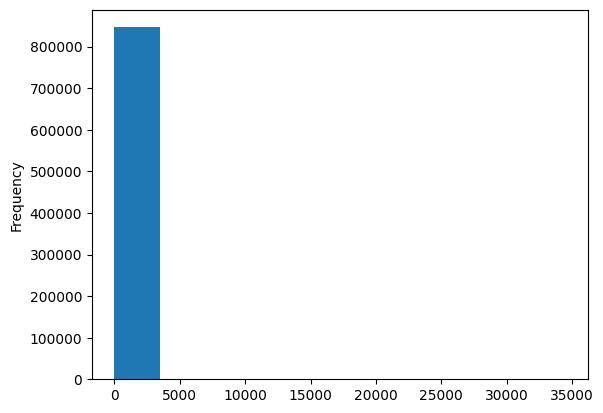

In [28]:
data.vote_count.plot.hist()

Most movies only have a handful of votes, while others can have tens of thousands.

### `release_date`

In [29]:
type(data['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

<Axes: >

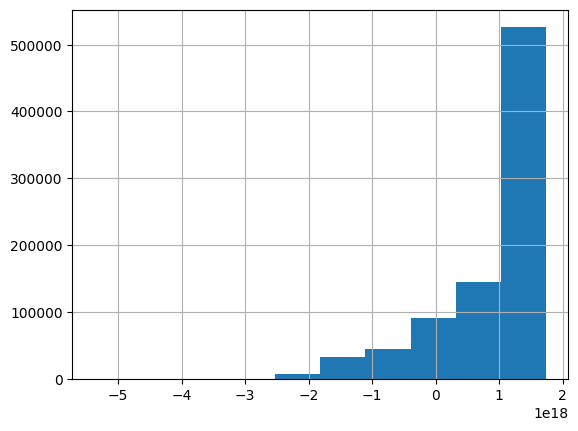

In [30]:
pd.to_numeric(data['release_date']).hist()

As expected the majority of movies are recent.

In [31]:
data[data['release_date'] == data['release_date'].min()]

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
583141,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0,1800-01-01,100000000,0,False,0,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.6,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,NaN


There are movies with improperly recorded dates.

In [32]:
data[data['release_date'] < pd.to_datetime('1900-01-01')].sort_values('release_date').head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
583141,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0,1800-01-01,100000000,0,False,0,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.600,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,NaN
567812,1233885,A Farsa de Inês Pereira,NaN,0,1800-09-11,0,56,False,0,NaN,pt,A Farsa de Inês Pereira,The farsades of ines pereira by the goat of my...,0.600,NaN,NaN,NaN,NaN,Portuguese,NaN
540414,1314804,Kaskisavun mailta,NaN,0,1837-10-29,0,14,False,0,NaN,en,Kaskisavun mailta,Finnish short documentary,0.651,NaN,NaN,NaN,Finland,Finnish,NaN
611979,1256924,Felix Nadar Spinning in his Chair,NaN,0,1865-01-01,0,1,False,0,NaN,en,Felix Nadar Spinning in his Chair,Felix Nadar Spinning in his Chair,0.000,The frames that spun!,NaN,NaN,NaN,NaN,NaN
534500,1244969,Felix Nadar Spinning in his Chair,NaN,0,1865-01-01,0,1,False,0,tt31150469,fr,Felix Nadar Spinning in his Chair,Felix Nadar Spinning in his Chair,0.600,NaN,Documentary,Paris Nadar Studio,NaN,No Language,NaN


Luckily there are only a handful of these. The first legitimate film is in 1865, anything claiming to be older will be removed.

In [33]:
data = data[data['release_date'] >= pd.to_datetime('1865-01-01')]

### `revenue`

In [34]:
data.revenue.describe()

count    8.479250e+05
mean     8.733779e+05
std      1.958273e+07
min     -1.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+09
Name: revenue, dtype: float64

In [35]:
data.revenue.info()

<class 'pandas.core.series.Series'>
Index: 847925 entries, 0 to 1140105
Series name: revenue
Non-Null Count   Dtype
--------------   -----
847925 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


In [36]:
revenue_sorted = data.sort_values('revenue')
revenue_sorted.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
196266,339294,Some Bears,7.0,2,2013-05-15,-12,8,False,12,NaN,en,Some Bears,A young man slips into a world of delusion aft...,0.6,"Bears, known in the wild for their cuddliness",NaN,NaN,United States of America,English,NaN
1140104,734804,Studio Moments,NaN,0,2020-01-01,0,8,False,0,NaN,en,Studio Moments,"A ""moving image"" work by Richard Garet with mu...",0.6,NaN,NaN,NaN,NaN,NaN,NaN
1118602,727492,The Bronze Horseman,NaN,0,2016-03-31,0,0,False,0,NaN,en,The Bronze Horseman,This fantasy ballet is based on Pushkin’s poem...,0.6,NaN,NaN,Mariinsky Theatre,NaN,NaN,NaN
1118603,727493,The Little Humpbacked Horse,NaN,0,2014-08-05,0,0,False,0,NaN,en,The Little Humpbacked Horse,The Little Humpbacked Horse is based on a Russ...,0.6,NaN,NaN,Mariinsky Theatre,NaN,NaN,NaN
1118605,727496,Teeth,NaN,0,2017-10-07,0,71,False,0,tt7535280,ro,Dintii,A couple of thiefs from a battlefield have a s...,0.6,NaN,Drama,NaN,Romania,Romanian,NaN


In [37]:
revenue_sorted.tail()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
282,76600,Avatar: The Way of Water,7.654,9830,2022-12-14,2320250281,192,False,460000000,tt1630029,en,Avatar: The Way of Water,Set more than a decade after the events of the...,241.285,Return to Pandora.,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English,"dying and death, loss of loved one, alien life..."
15,299534,Avengers: Endgame,8.263,23857,2019-04-24,2800000000,181,False,356000000,tt4154796,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,91.756,Avenge the fallen.,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa","superhero, time travel, space travel, time mac..."
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
554324,1224207,Adventures in Bora Bora,NaN,0,2023-08-23,3000000000,5,False,800000000,NaN,en,Adventures in Bora Bora,"The adventures in Bora Bora, is an astonishing...",0.000,(English),"Horror, War",NaN,NaN,English,NaN
230038,1270893,TikTok Rizz Party,10.000,1,2024-04-01,3000000000,180,False,250000000,NaN,en,TikTok Rizz Party,"a band of brothers, torn apart by the constant...",0.000,NaN,"Drama, Comedy",Warner Bros.,United States of America,NaN,"party, tiktok, rizz"


Most films have no revenue, but there are many highly grossing films.

### `runtime`

In [38]:
data.runtime.describe()

count    847925.000000
mean         48.082085
std          59.384246
min           0.000000
25%           3.000000
50%          30.000000
75%          88.000000
max       14400.000000
Name: runtime, dtype: float64

In [39]:
data.runtime.info()

<class 'pandas.core.series.Series'>
Index: 847925 entries, 0 to 1140105
Series name: runtime
Non-Null Count   Dtype
--------------   -----
847925 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


In [40]:
zero_runtime = data[data['runtime'] == 0]
print(f"There are {len(zero_runtime)} movies with zero runtime.")

There are 185996 movies with zero runtime.


Many movies have their runtime listed as zero. These will be considered missing data.

In [41]:
data.runtime = data.runtime.replace(0, np.nan)

<Axes: ylabel='Frequency'>

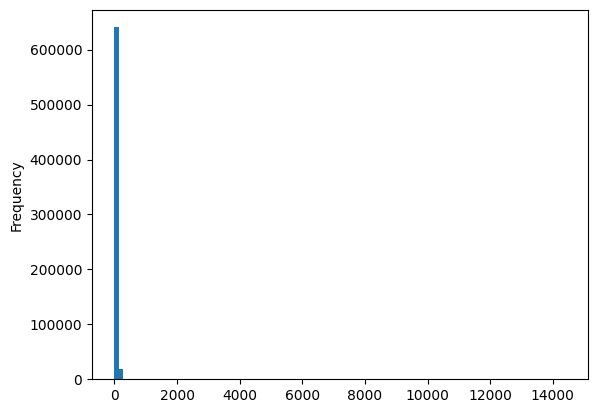

In [42]:
data.runtime.plot.hist(bins=100)

There are a few strong outliers.

<Axes: ylabel='Frequency'>

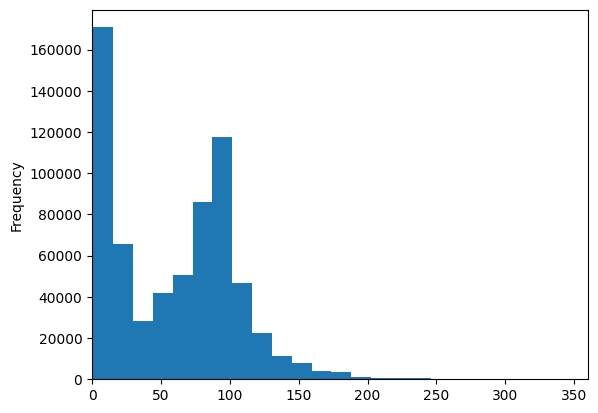

In [43]:
data.runtime.plot.hist(bins=1000, xlim=(0, 360))

### `budget`

In [44]:
data.budget.describe()

count    8.479250e+05
mean     3.324472e+05
std      5.222808e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.880000e+08
Name: budget, dtype: float64

In [45]:
data.budget.info()

<class 'pandas.core.series.Series'>
Index: 847925 entries, 0 to 1140105
Series name: budget
Non-Null Count   Dtype
--------------   -----
847925 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


<Axes: >

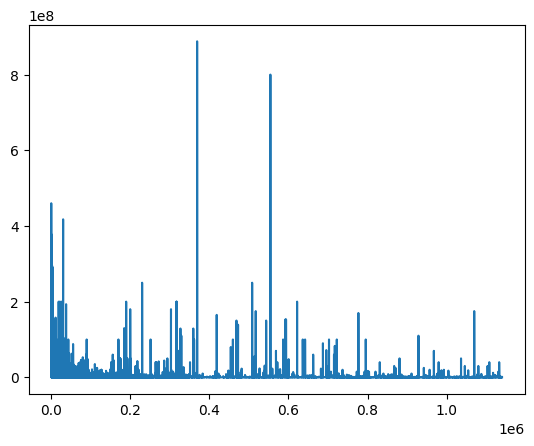

In [46]:
data.budget.plot()

## `imdb_id`

In [47]:
data.imdb_id.describe()

count         526557
unique        526234
top       tt32094375
freq              22
Name: imdb_id, dtype: object

There are some rows with duplicate IMDB IDs.

In [48]:
data[data.imdb_id.duplicated()]

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
5531,836466,Return,6.291,619,2020-06-10,0,12.0,False,0,NaN,en,Return,A single man has worked most of his life in a ...,7.915,NaN,Animation,NaN,NaN,NaN,NaN
7425,1040330,Black Adam: Saviour or Destroyer?,6.998,404,2022-10-15,0,22.0,False,0,NaN,en,Black Adam: Saviour or Destroyer?,Ahead of the release of upcoming fantasy film ...,10.918,NaN,Documentary,NaN,NaN,English,behind the scenes
8870,665399,BTS World Tour: Love Yourself - Japan Edition,9.172,306,2019-10-09,0,231.0,False,0,NaN,ko,BTS World Tour: Love Yourself - Japan Edition,BTS perform their Japan concert at Tokyo Dome ...,4.892,NaN,"Music, Documentary",Big Hit Entertainment,South Korea,Korean,"making of, concert film, choreography"
11155,1086372,Return,6.599,217,1972-07-02,0,82.0,False,0,NaN,hy,Return,The main character of the film is an outstandi...,4.835,NaN,NaN,NaN,NaN,NaN,NaN
11301,15257,Hulk vs. Wolverine,7.099,213,2009-01-27,0,38.0,False,0,NaN,en,Hulk vs. Wolverine,Department H sends in Wolverine to track down ...,14.562,NaN,"Animation, Action, Science Fiction, Adventure,...","Lionsgate, Marvel Animation",United States of America,English,"superhero, mutant, based on comic, norse mytho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140100,734797,Yui Ogura 1st Live Tour High-Touch☆Summer,NaN,0,2017-02-08,0,136.0,False,0,NaN,en,Yui Ogura 1st Live Tour High-Touch☆Summer,This is the first solo live tour for popular v...,0.600,Yui Ogura 1st Live Tour,NaN,NaN,NaN,Japanese,NaN
1140101,734799,Girls' School,NaN,0,1982-01-01,0,91.0,False,0,NaN,zh,Nu zi xue jiao,Also known as Girls' School.,0.840,NaN,NaN,NaN,NaN,NaN,"teen movie, relationship, female sexuality, queer"
1140103,734803,Lines,NaN,0,2017-01-01,0,10.0,False,0,NaN,en,Lines,Richard Garet’s moving image work is character...,0.600,NaN,NaN,NaN,NaN,NaN,NaN
1140104,734804,Studio Moments,NaN,0,2020-01-01,0,8.0,False,0,NaN,en,Studio Moments,"A ""moving image"" work by Richard Garet with mu...",0.600,NaN,NaN,NaN,NaN,NaN,NaN


These are all rows with missing IMDB IDs. They will be dropped.

In [49]:
data = data.drop_duplicates(subset=['imdb_id'])

In [50]:
data.imdb_id.describe()

count        526234
unique       526234
top       tt3281206
freq              1
Name: imdb_id, dtype: object

In [51]:
data.imdb_id.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: imdb_id
Non-Null Count   Dtype 
--------------   ----- 
526234 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


## `original_language`

In [52]:
data.original_language.describe()

count     526235
unique       162
top           en
freq      268511
Name: original_language, dtype: object

In [53]:
data.original_language.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: original_language
Non-Null Count   Dtype 
--------------   ----- 
526235 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


<Axes: ylabel='count'>

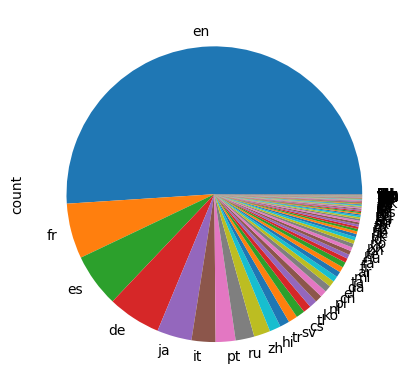

In [54]:
data.original_language.value_counts().plot.pie()

## `original_title`

In [55]:
data.original_title.describe()

count     526235
unique    474130
top         Home
freq          50
Name: original_title, dtype: object

In [56]:
data.original_title.sample(5)

503017             Du goût et des couleurs
192819                     Las tres Elenas
829833                      Le Cri du cœur
49658                           The Intent
12297     The Bugs Bunny/Road Runner Movie
Name: original_title, dtype: object

In [57]:
data.original_title.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: original_title
Non-Null Count   Dtype 
--------------   ----- 
526235 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


## `overview`

In [58]:
data.overview.describe()

count                   462150
unique                  456120
top       Mexican feature film
freq                       897
Name: overview, dtype: object

In [59]:
data.overview.sample(5)

1088038    Day after day, Mr. Jonas and Mr. Schmidt make ...
1096216    Unfinished and lost film directed by Rustam Kh...
6162       When the crew of an American tugboat boards an...
197872     A man and a woman surrounded by the overwhelmi...
143645     Billy is a bit of a masher. He meets a lady on...
Name: overview, dtype: object

In [60]:
data.overview.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: overview
Non-Null Count   Dtype 
--------------   ----- 
462150 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


## `popularity`

In [61]:
data.popularity.describe()

count    526235.000000
mean          1.935587
std          10.313868
min           0.000000
25%           0.600000
50%           0.710000
75%           1.400000
max        2994.357000
Name: popularity, dtype: float64

In [62]:
data.popularity.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: popularity
Non-Null Count   Dtype  
--------------   -----  
526235 non-null  float64
dtypes: float64(1)
memory usage: 8.0 MB


<Axes: >

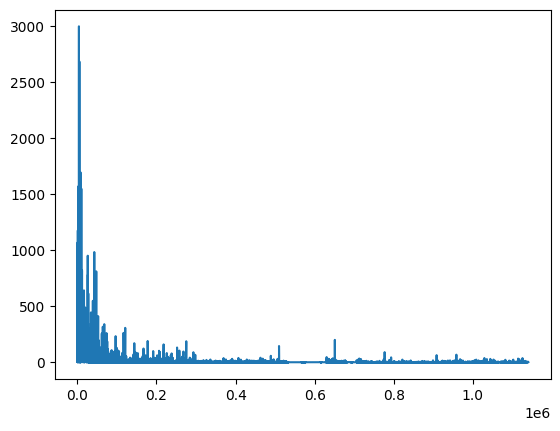

In [63]:
data.popularity.plot()

## `tagline`

In [64]:
data.tagline.describe()

count                     94967
unique                    93540
top       Based on a true story
freq                         24
Name: tagline, dtype: object

In [65]:
data.tagline.sample(5)

827616                               New York Murder Case
24827              So Many Mr. Wrongs. So Few Mr. Rights.
243517                                                NaN
7508      Passion at ten. Envy at eleven. Murder at noon.
871171                                    Getting Tighter
Name: tagline, dtype: object

In [66]:
data.tagline.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: tagline
Non-Null Count  Dtype 
--------------  ----- 
94967 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


## `genres`

In [67]:
data.genres.describe()

count     429689
unique     10916
top        Drama
freq       74730
Name: genres, dtype: object

The genres in the `genre` column are all in one string. They need to be split up to be own their own.

In [68]:
data.genres = data.genres.apply(lambda genres: [genre.strip() for genre in genres.split(',')] if isinstance(genres, str) else genres)

Now the genres are lists.

In [69]:
data.genres.describe()

count      429689
unique      10916
top       [Drama]
freq        74730
Name: genres, dtype: object

In [70]:
data.genres.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: genres
Non-Null Count   Dtype 
--------------   ----- 
429689 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [71]:
genre_list = data.genres.explode()
genre_list.unique()

array(['Action', 'Science Fiction', 'Adventure', 'Drama', 'Crime',
       'Thriller', 'Fantasy', 'Comedy', 'Romance', 'Western', 'Mystery',
       'War', 'Animation', 'Family', 'Horror', 'Music', 'History',
       'TV Movie', 'Documentary', nan], dtype=object)

<Axes: ylabel='count'>

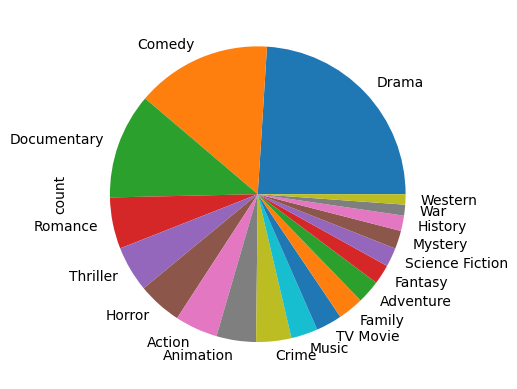

In [72]:
genre_list.value_counts().plot.pie()

## `production_companies`

In [73]:
data.production_companies.describe()

count                  303689
unique                 151053
top       Metro-Goldwyn-Mayer
freq                     2025
Name: production_companies, dtype: object

In [74]:
data.production_companies.sample(5)

142191                                                  NaN
760611                                            AVP Films
782878                                  Vertigoheights Film
14878     UK Film Council, EM Media, Screen Yorkshire, F...
75020     Young America Productions Inc., Centron Corpor...
Name: production_companies, dtype: object

The production companies in the `production_companies` column are all in one string. They need to be split up to be own their own.

In [75]:
data.production_companies = data.production_companies.apply(lambda companies: [company.strip() for company in companies.split(',')] if isinstance(companies, str) else companies)


Now the companies are in lists.

In [76]:
data.production_companies.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: production_companies
Non-Null Count   Dtype 
--------------   ----- 
303689 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [77]:
companies = data.production_companies.explode()
companies.unique()

array(['Legendary Pictures', 'Syncopy', 'Warner Bros. Pictures', ...,
       'Encounter Studios', 'Sky Blue Productions',
       "Les Vues de l'Esprit"], dtype=object)

In [97]:
len(companies.unique())

120136

## `production_countries`

In [79]:
data.production_countries.describe()

count                       386674
unique                        8753
top       United States of America
freq                        107558
Name: production_countries, dtype: object

In [100]:
data.production_countries.sample(5)

200312               Poland, Italy
55589     United States of America
352129              Albania, Spain
447314    United States of America
851006                         NaN
Name: production_countries, dtype: object

The countries in the `production_countries` column are all in one string. They need to be split up on their own.

In [101]:
data.production_countries = data.production_countries.apply(lambda countries: [country.strip() for country in countries.split(',')] if isinstance(countries, str) else countries)

Now the countries are in lists.

In [99]:
data.production_countries.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: production_countries
Non-Null Count   Dtype 
--------------   ----- 
386674 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [107]:
countries = data.production_countries.explode()
countries.unique()

array(['United Kingdom', 'United States of America', 'Canada',
       'New Zealand', 'Australia', 'South Africa', 'France', 'Germany',
       'Hong Kong', 'Taiwan', 'India', 'South Korea', 'Netherlands',
       'Japan', 'China', 'Malta', 'Bulgaria', 'Hungary', 'Mexico',
       'Spain', 'Italy', 'Brazil', 'Czech Republic',
       'United Arab Emirates', 'Switzerland', 'Belgium', 'Ireland',
       'Poland', 'Denmark', 'Russia', 'Norway', 'Sweden', 'Slovenia',
       'Romania', 'Greece', nan, 'Colombia', 'Iceland', 'Turkey',
       'Philippines', 'Luxembourg', 'Austria', 'Morocco', 'Finland',
       'Israel', 'Portugal', 'Indonesia', 'Thailand', 'Argentina',
       'Chile', 'Serbia', 'Solomon Islands', 'Dominican Republic',
       'Guadaloupe', 'Peru', 'Soviet Union', 'Slovakia', 'Puerto Rico',
       'Uruguay', 'Paraguay', 'Ghana', 'Iran', 'Cyprus', 'Lebanon',
       'Qatar', 'Malawi', 'Singapore', 'Malaysia', 'Botswana',
       'Venezuela', 'Czechoslovakia', 'Iraq', 'Yugoslavia', 'Macao

In [106]:
countries

0                    United Kingdom
0          United States of America
1                    United Kingdom
1          United States of America
2                    United Kingdom
                     ...           
1140084                     Germany
1140085                      Canada
1140089                         NaN
1140090                         NaN
1140091                         NaN
Name: production_countries, Length: 577381, dtype: object

<Axes: ylabel='count'>

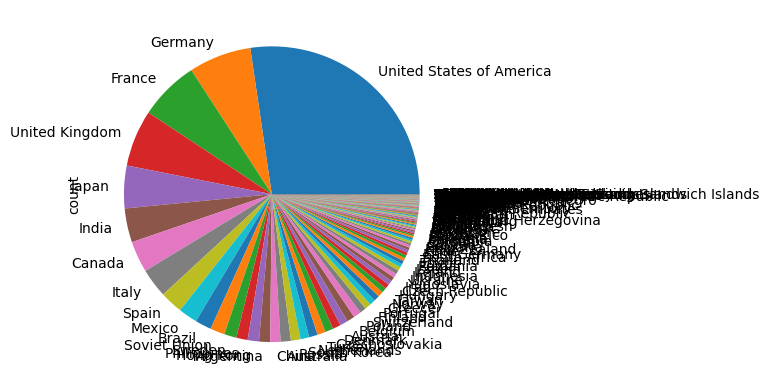

In [114]:
countries.value_counts().plot.pie()

## `spoken_languages`

In [82]:
data.spoken_languages.describe()

count      387950
unique       6207
top       English
freq       137336
Name: spoken_languages, dtype: object

In [83]:
data.spoken_languages.sample(5)

34900     English, French, Hungarian
49678                    No Language
89856                       Mandarin
225508                       English
898154                       English
Name: spoken_languages, dtype: object

The languages in the `spoken_languages` column are in strings. They need to be split up.

In [115]:
data.spoken_languages = data.spoken_languages.apply(lambda languages: [language.strip() for language in languages.split(',')] if isinstance(languages, str) else languages)

In [116]:
data.spoken_languages.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: spoken_languages
Non-Null Count   Dtype 
--------------   ----- 
387950 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [117]:
languages = data.spoken_languages.explode()
languages.unique()

array(['English', 'French', 'Japanese', 'Swahili', 'Mandarin', 'Spanish',
       'Hindi', 'Russian', 'Xhosa', 'Persian', 'Urdu', 'Arabic', 'German',
       'Swedish', 'Italian', 'Romanian', 'Korean', 'Norwegian', 'Latin',
       'Tagalog', 'Hungarian', 'Cantonese', 'Turkish', 'Greek', 'Malay',
       'Czech', 'Polish', 'Hebrew', 'Dutch', 'Vietnamese', 'Yiddish',
       'Tamil', 'Finnish', 'Somali', 'Nepali', 'Tibetan', 'Portuguese',
       'Gaelic', 'Albanian', 'Thai', 'Indonesian', 'Danish', 'Irish',
       'Estonian', 'Afrikaans', 'Chichewa; Nyanja', 'Sotho', 'Zulu',
       'Sinhalese', 'Khmer', 'Bulgarian', 'Icelandic', 'Samoan',
       'Bengali', 'Esperanto', 'Haitian; Haitian Creole', 'Ukrainian',
       'Breton', 'Croatian', 'Inuktitut', 'Armenian', 'Sanskrit',
       'Georgian', 'Pushto', 'Burmese', 'Northern Sami', 'Slovak',
       'Quechua', 'Navajo', 'No Language', 'Serbian', 'Serbo-Croatian',
       'Welsh', 'Moldavian', nan, 'Cornish', 'Lithuanian', 'Fulah',
       'Punjabi

<Axes: ylabel='count'>

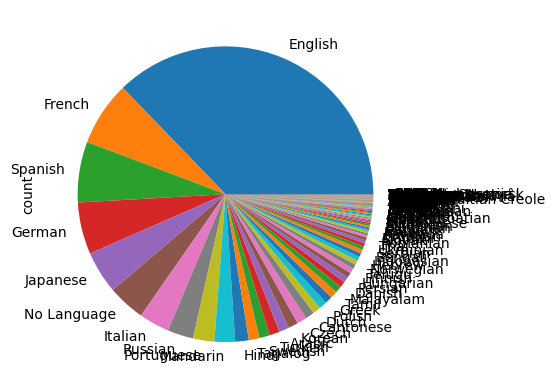

In [118]:
languages.value_counts().plot.pie()

## `keywords`


In [85]:
data.keywords.describe()

count             187190
unique            121866
top       woman director
freq                7301
Name: keywords, dtype: object

In [119]:
data.keywords.sample(5)

35839                                                   NaN
891426    marriage crisis, murder, illicit affair, mind ...
22836                                                viking
10844     high school, teacher, misfit, teen movie, scho...
176827          zebra, botswana, nature, nature documentary
Name: keywords, dtype: object

The keywords in the `keywords` column are all in one string. They need to be split up.

In [120]:
data.keywords = data.keywords.apply(lambda keywords: [keyword.strip() for keyword in keywords.split(',')] if isinstance(keywords, str) else keywords)

In [121]:
data.keywords.info()

<class 'pandas.core.series.Series'>
Index: 526235 entries, 0 to 1140091
Series name: keywords
Non-Null Count   Dtype 
--------------   ----- 
187190 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [122]:
keywords = data.keywords.explode()
keywords.unique()

array(['rescue', 'mission', 'dream', ..., 'bhajarangi', 'tapalin',
       'ice breaker'], dtype=object)

In [124]:
keywords.value_counts()

keywords
short film                18295
woman director            13881
based on novel or book     5632
murder                     4410
lgbt                       3958
                          ...  
seri indians                  1
bhajarangi                    1
ske48                         1
edgewood                      1
قاسم الملاك                   1
Name: count, Length: 41986, dtype: int64

## Exporting

In [88]:
data.to_csv('../Datasets/clean.csv')